
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

A lot of movies are produced every year. Some of them got higher revenue than the others. This investigation aims to investigate a dataset from TMDb.

The directing questions for this investigation is as follows:

1. Which genres are most popular from year to year?
2. What kinds of properties are associated with movies that have high revenues?

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
# number of duplicated rows
sum(df.duplicated())

1

In [5]:
# number of null values
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
# There are missing budgets values
df.query('budget == 0').shape

(5696, 21)

In [7]:
# missing revenue values
df.query('revenue == 0').shape

(6016, 21)

In [8]:
def get_all_companies(df):
    """
    this function returns all companies in the given dataframe
    """
    array = df.query('production_companies != ""')['production_companies'].unique()
    companies = set()
    for row in array:
        row = str(row)
        strarr = row.split('|')
        for company in strarr:
            companies.add(company)
    return companies
all_companies = get_all_companies(df)
len(all_companies)

7880

In [9]:
def get_all_genres(df):
    """
    this function returns all genres in the given dataframe
    """
    array = df.query('genres != ""')['genres'].unique()
    genres = set()
    for row in array:
        row = str(row)
        strarr = row.split('|')
        for genre in strarr:
            genres.add(genre)
    return genres
all_genres = get_all_genres(df)
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western',
 'nan'}


### Data Cleaning (Replace this with more specific notes!)

In [10]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

# Remove rows with missing revenue value
df = df[df.revenue != 0]

# Remove rows with missing budget value
df = df[df.budget != 0]

# there is a genres value with nan
# Remove genres value with nan
df = df[df.genres != 'nan']
all_genres = get_all_genres(df)
all_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Which genres are most popular from year to year?)

In the next two cell, I try to find if there is a relationship between number of movies ber years and how number of movies per year affects on popularity.

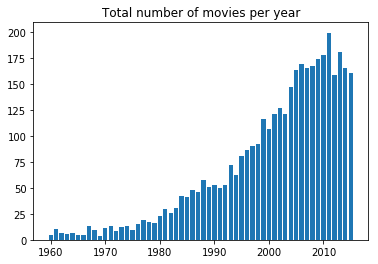

In [11]:
# total number of movies per year
plt.bar(df.groupby('release_year').size().keys(),df.groupby('release_year').size().values)
plt.title('Total number of movies per year')
plt.show()

In [12]:
rows,c = df.shape

In 2011 we have a peak with 199 movie. In this year was produced the largest number of movies.

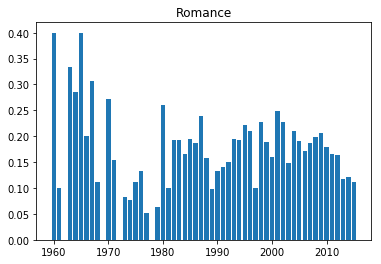

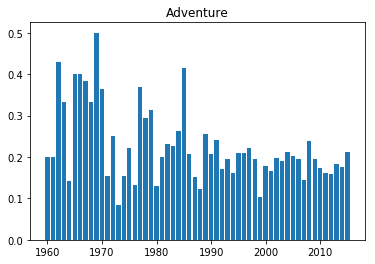

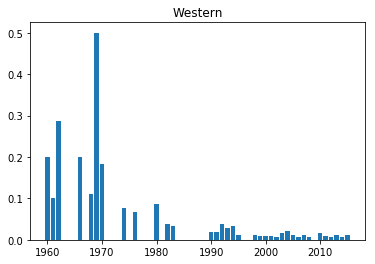

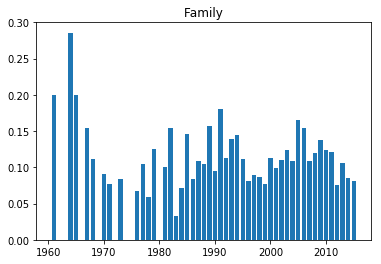

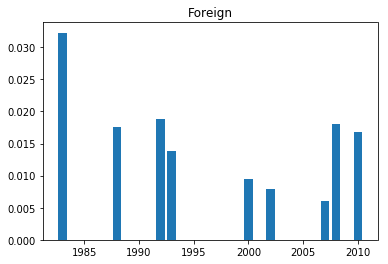

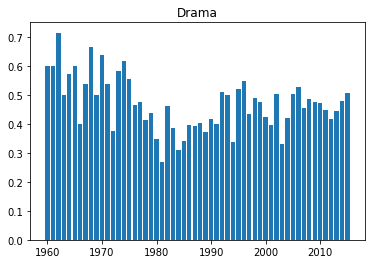

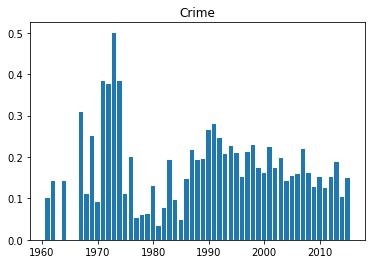

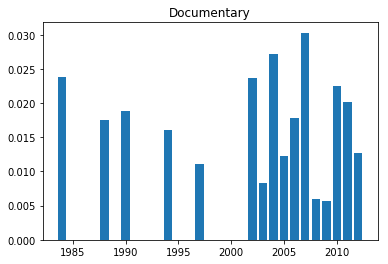

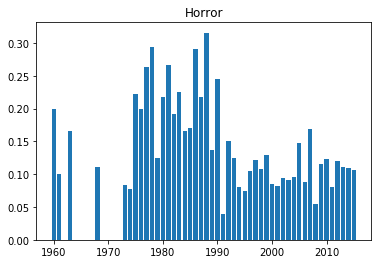

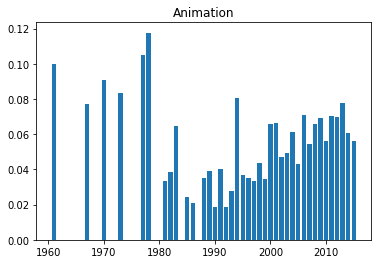

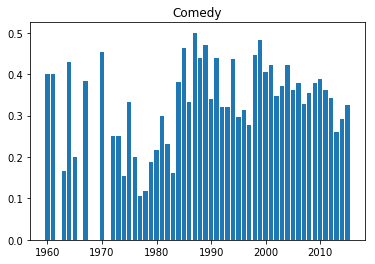

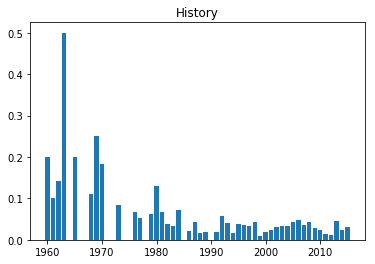

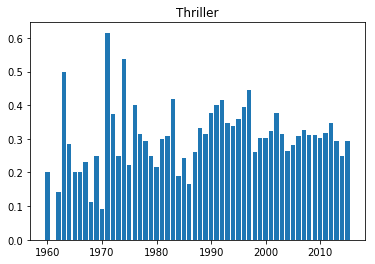

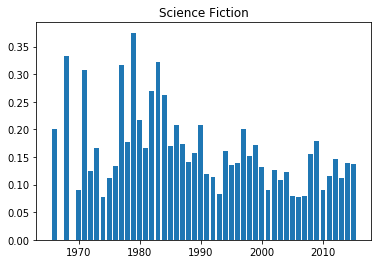

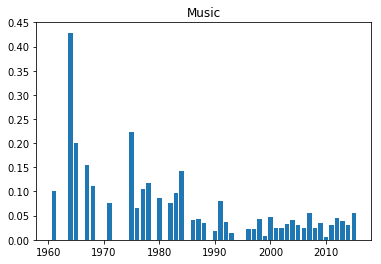

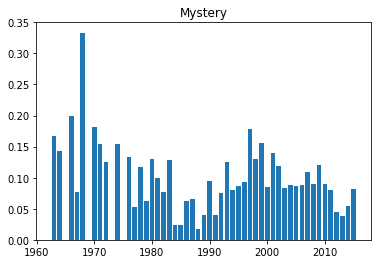

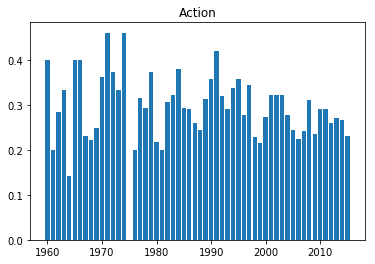

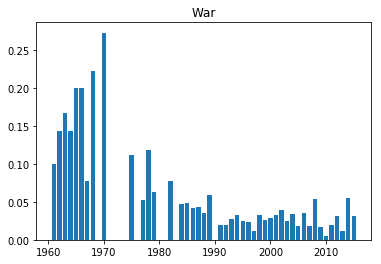

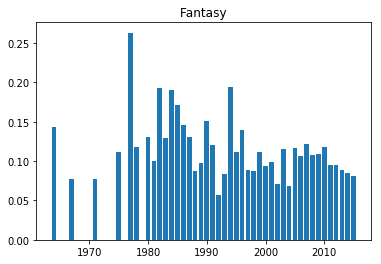

In [13]:
# number of movies per year for each genre
for genre in all_genres:
    if genre == 'TV Movie':
        continue
    y = df.groupby('release_year').size()
    x = df[df['genres'].str.contains(genre)].groupby('release_year').size()
    z = x/y
    plt.bar(z.keys(),z.values,label=genre)
    plt.title(genre)
    plt.show()

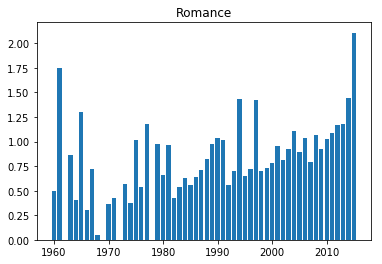

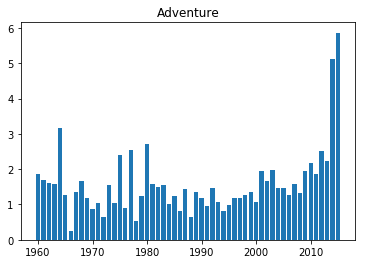

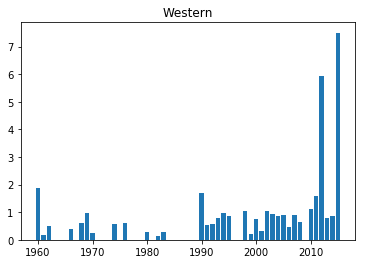

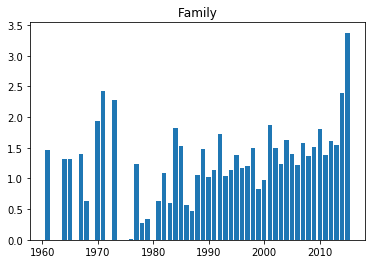

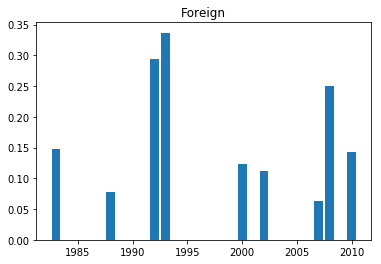

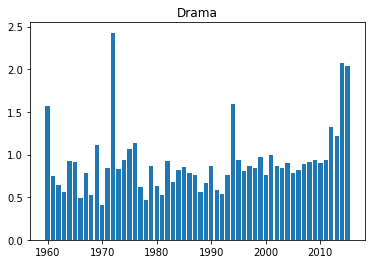

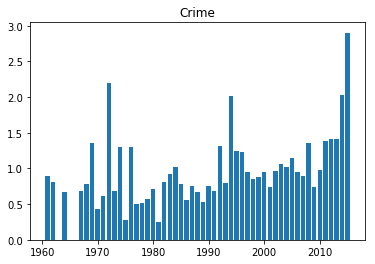

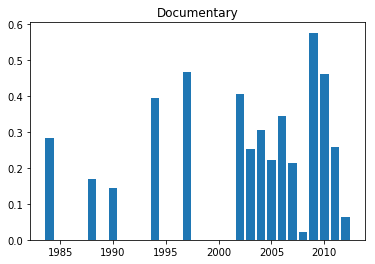

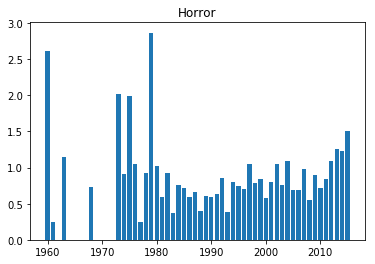

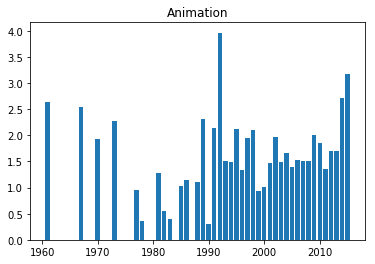

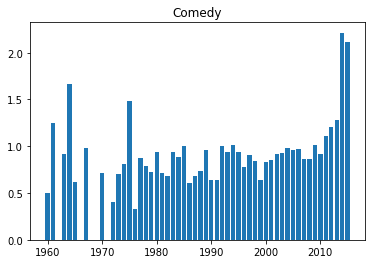

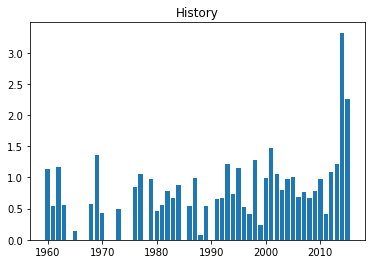

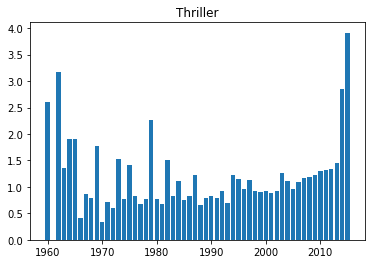

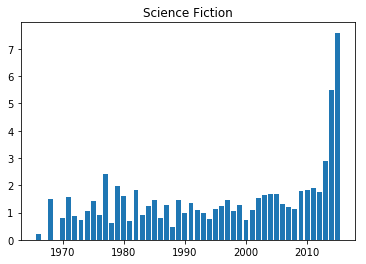

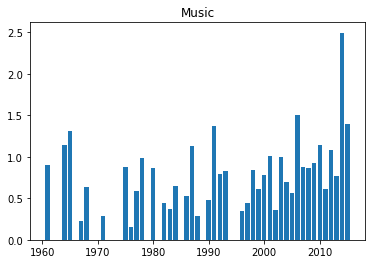

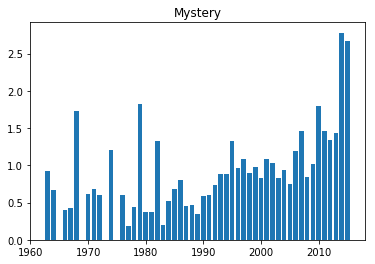

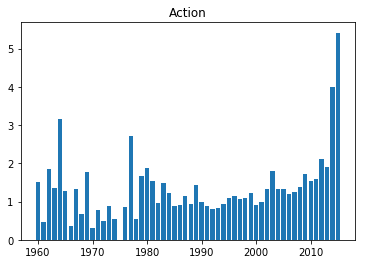

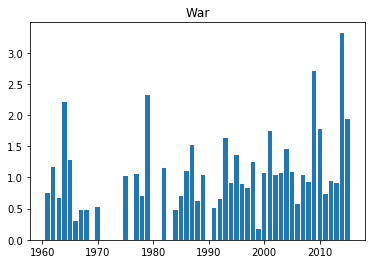

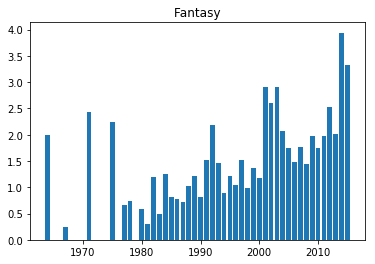

In [14]:
# plot a histogram to show the popularity over years relationship for each genre
for genre in all_genres:
    if genre == 'TV Movie':
        continue
    x = df[df['genres'].str.contains(genre)].groupby('release_year').mean()['popularity']
    plt.bar(x.keys(),x.values,label=genre)
    plt.title(genre)
    plt.show()

/Users/ahmedashraf/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


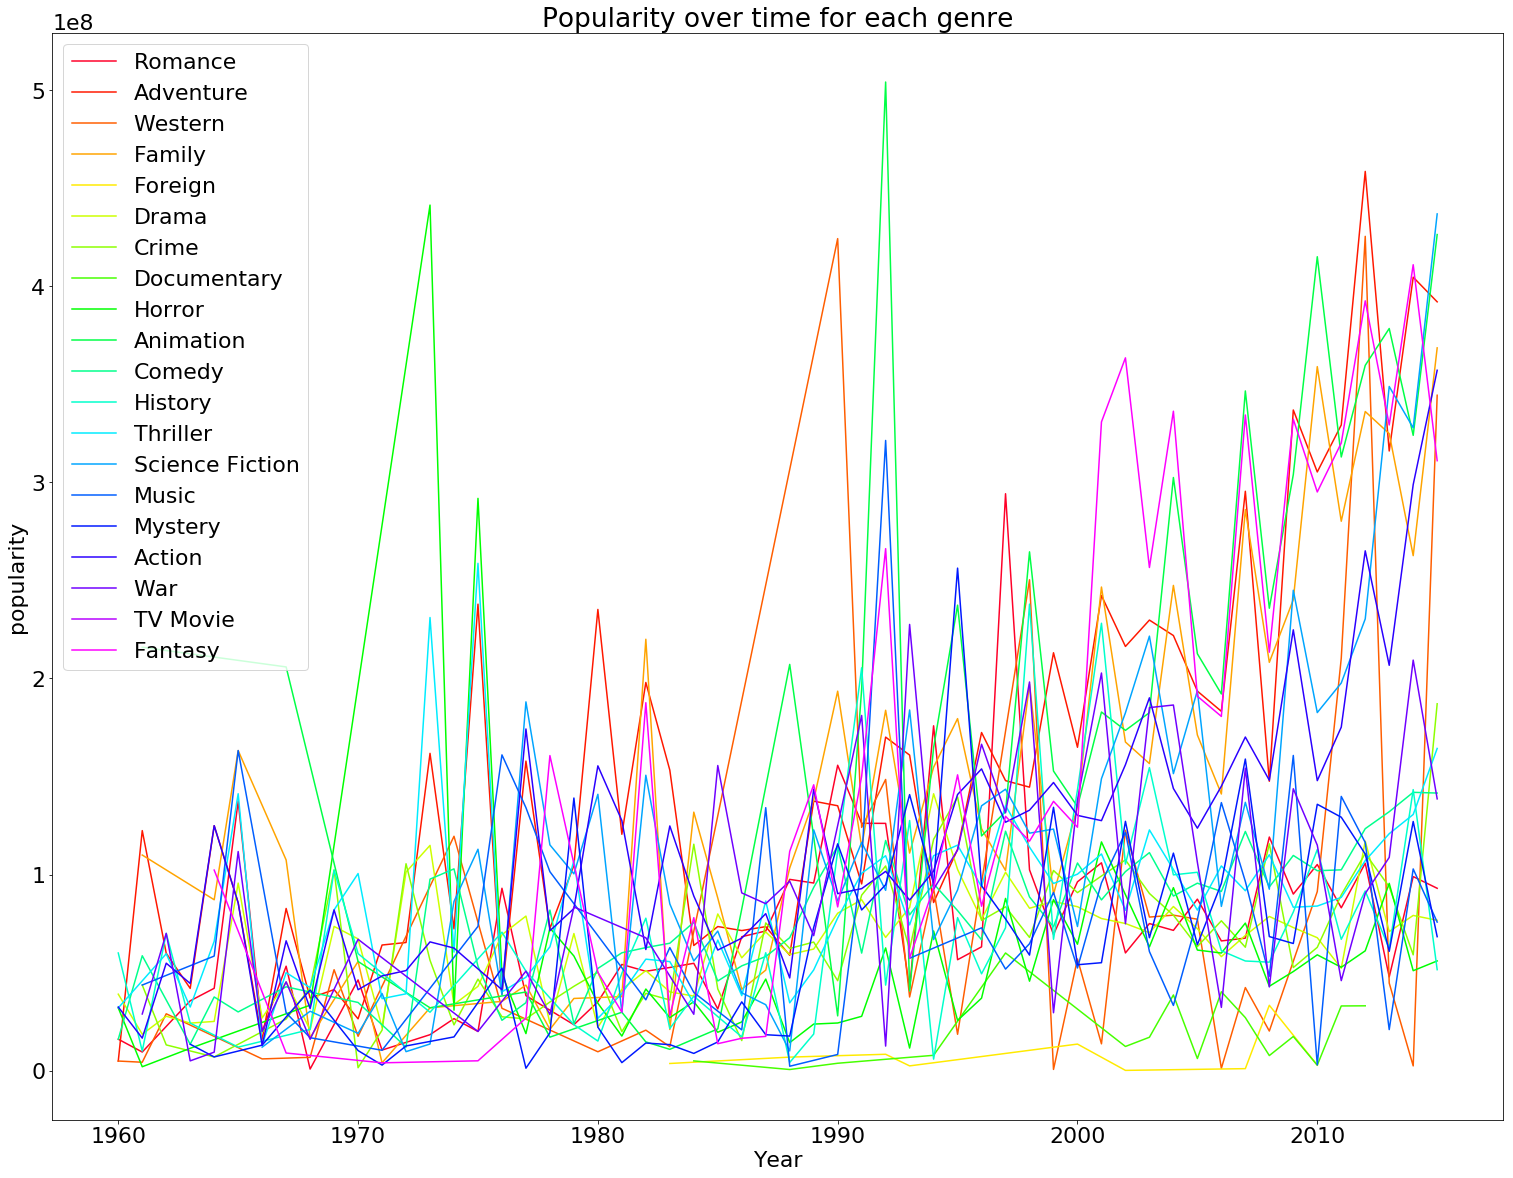

In [15]:
NUM_COLORS = 20
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
cm = plt.get_cmap('gist_rainbow')
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(26,20))
ax = fig.add_subplot(111)
ax.set_color_cycle([cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])
for genre in all_genres:
    x = df[df['genres'].str.contains(genre)].groupby('release_year').mean()['revenue']
    plt.plot(x.keys(),x.values,label=genre)
plt.xlabel('Year')
plt.ylabel('popularity')
plt.legend()
plt.title('Popularity over time for each genre')
plt.show()

As we can see above, Generally popularity on average increases over time for each genre due to the increase in movies production over years. Popularity does not have a great change over years for most of the genres but we notice a significant increase for these genres "Science Fiction, Adventure ,Action, Fantasy" with peaks at bin '2015' for all of the four genres. I think this happened due to the great evolution in technology and movies industry over years.

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In the cell below, I try to find if there is a relationship between genres and revenues.

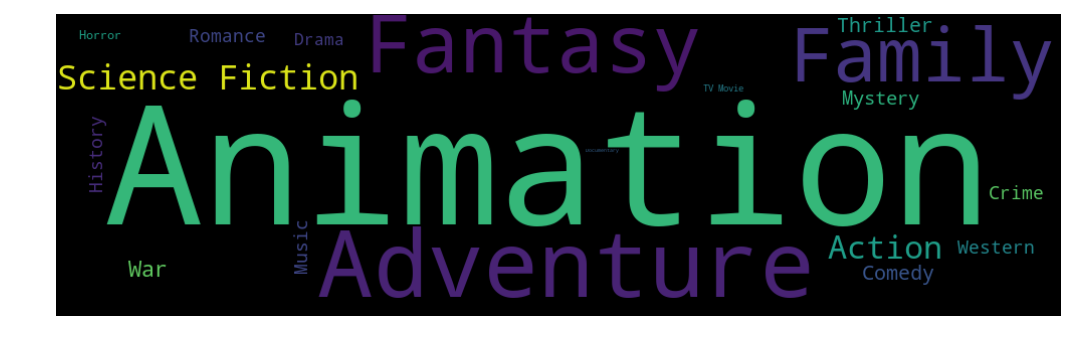

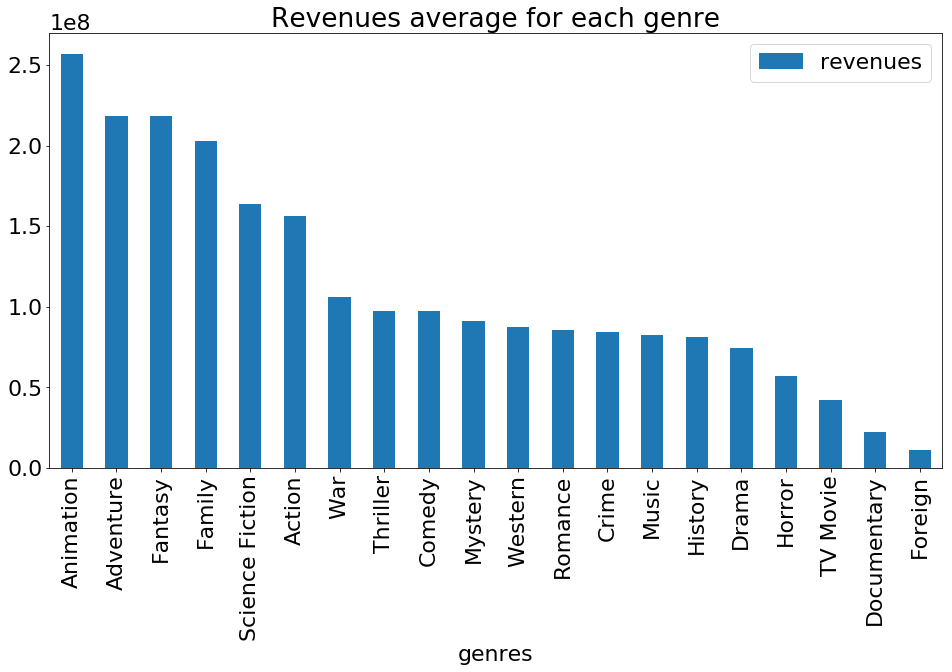

In [16]:
gen_rev_df=pd.DataFrame()
gen_rev_df['genres'] = list(all_genres)
revs = []
words = dict()
for genre in all_genres:
    x = df[df['genres'].str.contains(genre)].mean()['revenue']
    revs.append(x)
    words[genre]=x

# setting wordcloud
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
wordcloud = WordCloud(width=1000,height=300, 
                      max_words=1628,relative_scaling=1,
                      normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud, interpolation="bilinear")
ax1.axis('off')    
#----------------------------------------

gen_rev_df['revenues']=revs
gen_rev_df.sort_values(by=['revenues'],ascending=False).plot(title='Revenues average for each genre',
                                                             x='genres',y='revenues',kind='bar',figsize=(16,8));

As we can see from wordcloud and graph above, Animation movies get the hightest average for revenues followed by adventure, fantasy, and family movies.

In the next cell, I want to discover how runtime, budget and popularity affect on revenues.

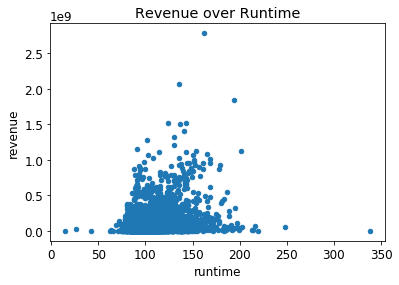

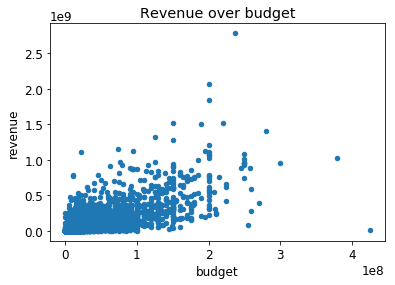

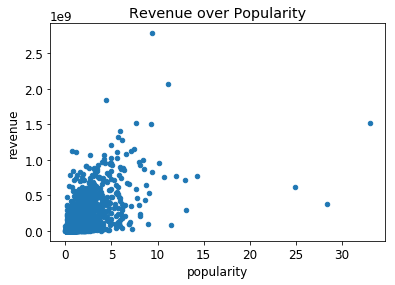

In [17]:
# Changing font size
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)

# drawing scatters plots to find if there is a relationship between revenues and runtime
df.plot(title='Revenue over Runtime',x='runtime',y='revenue',kind='scatter');
# drawing scatters plots to find if there is a relationship between revenues and budget
df.plot(title='Revenue over budget',x='budget',y='revenue',kind='scatter');
# drawing scatters plots to find if there is a relationship between revenues and popularity
df.plot(title='Revenue over Popularity',x='popularity',y='revenue',kind='scatter');

 As we can see above, Runtime, budget and popularity do not have linear relationships over revenue.

<a id='conclusions'></a>
## Conclusions

* It was found that popularity on average tend to rise for each genre.

* Popularity for these genres (Science Fiction, Adventure, Action and Fantasy) tend to rises more fastly than the other genres.

* Animation movies has the hightest revenues on average.

It is important to keep in mind that this analysis has limitations due to using revenues with ignoring inflation over time. Getting more data like average age for filmgoers for each movie and income per capita for each year can improve our analysis. Getting data about national crisis and disasters times can also improve our analysis.